## Carga Inicial y Exploración de datos

In [1]:
import h5py

# Nombre del archivo
filename = "OMI-Aura_L3-OMUVBd_2005m0101_v003-2016m0526t094633.he5"

# Visualizamos la data
with h5py.File(filename, "r") as file: 
    def visitor(name, obj):
        print(name)
    file.visititems(visitor)

HDFEOS
HDFEOS/ADDITIONAL
HDFEOS/ADDITIONAL/FILE_ATTRIBUTES
HDFEOS/GRIDS
HDFEOS/GRIDS/OMI UVB Product
HDFEOS/GRIDS/OMI UVB Product/Data Fields
HDFEOS/GRIDS/OMI UVB Product/Data Fields/CSErythemalDailyDose
HDFEOS/GRIDS/OMI UVB Product/Data Fields/CSErythemalDoseRate
HDFEOS/GRIDS/OMI UVB Product/Data Fields/CSIrradiance305
HDFEOS/GRIDS/OMI UVB Product/Data Fields/CSIrradiance310
HDFEOS/GRIDS/OMI UVB Product/Data Fields/CSIrradiance324
HDFEOS/GRIDS/OMI UVB Product/Data Fields/CSIrradiance380
HDFEOS/GRIDS/OMI UVB Product/Data Fields/CSUVindex
HDFEOS/GRIDS/OMI UVB Product/Data Fields/CloudOpticalThickness
HDFEOS/GRIDS/OMI UVB Product/Data Fields/ErythemalDailyDose
HDFEOS/GRIDS/OMI UVB Product/Data Fields/ErythemalDoseRate
HDFEOS/GRIDS/OMI UVB Product/Data Fields/Irradiance305
HDFEOS/GRIDS/OMI UVB Product/Data Fields/Irradiance310
HDFEOS/GRIDS/OMI UVB Product/Data Fields/Irradiance324
HDFEOS/GRIDS/OMI UVB Product/Data Fields/Irradiance380
HDFEOS/GRIDS/OMI UVB Product/Data Fields/LambertianEqu

In [3]:
# Path del ozono y del cloud fraction
dataset_path_uv = "HDFEOS/GRIDS/OMI UVB Product/Data Fields/UVindex"
    
# Cargamos la data y la ponemos en variables
with h5py.File(filename, "r") as file:
    uv_data = file[dataset_path_uv][:]
    meta_str = file["HDFEOS INFORMATION/StructMetadata.0"][()].decode()
    print(meta_str)

GROUP=SwathStructure
END_GROUP=SwathStructure
GROUP=GridStructure
	GROUP=GRID_1
		GridName="OMI UVB Product"
		XDim=360
		YDim=180
		UpperLeftPointMtrs=(-180000000.000000,-90000000.000000)
		LowerRightMtrs=(180000000.000000,90000000.000000)
		PixelRegistration=HE5_HDFE_CENTER
		Projection=HE5_GCTP_GEO
		GROUP=Dimension
			OBJECT=Dimension_1
				DimensionName="XDim"
				Size=360
			END_OBJECT=Dimension_1
			OBJECT=Dimension_2
				DimensionName="YDim"
				Size=180
			END_OBJECT=Dimension_2
		END_GROUP=Dimension
		GROUP=DataField
			OBJECT=DataField_1
				DataFieldName="CSErythemalDailyDose"
				DataType=H5T_NATIVE_FLOAT
				DimList=("YDim","XDim")
				MaxdimList=("YDim","XDim")
				CompressionType=HE5_HDFE_COMP_DEFLATE
				DeflateLevel=5
			END_OBJECT=DataField_1
			OBJECT=DataField_2
				DataFieldName="CSErythemalDoseRate"
				DataType=H5T_NATIVE_FLOAT
				DimList=("YDim","XDim")
				MaxdimList=("YDim","XDim")
				CompressionType=HE5_HDFE_COMP_DEFLATE
				DeflateLevel=5
			END_OBJECT=Da

## Visualización data mundial

In [4]:
# Paleta de colores custom
from matplotlib.colors import LinearSegmentedColormap

colors = [
    (0.6, 0.0, 0.0),    # dark red
    (1.0, 0.4, 0.2),    # orange-red
    (1.0, 0.9, 0.5),    # light yellow
    (0.7, 0.9, 0.7),    # pale green
    (0.4, 0.7, 0.9),    # light blue
    (0.2, 0.4, 0.8),    # medium blue
    (0.1, 0.2, 0.4)     # dark blue
]
custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)
custom_cmap = custom_cmap.reversed()

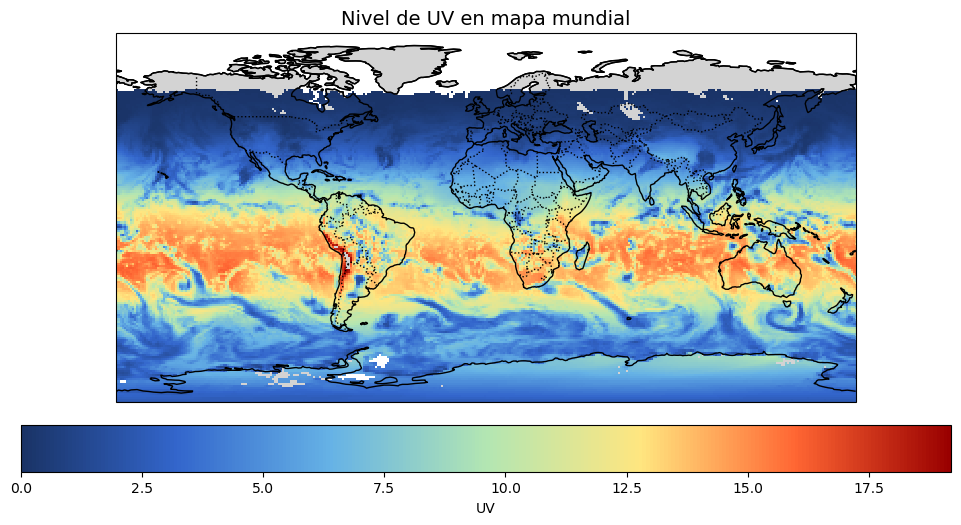

In [7]:
# Importamos algunas librerías que vamos a usar
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Rellena valores menores a 0 como si fuera data faltante
uv_data = np.where(uv_data < 0, np.nan, uv_data)

# Create latitude and longitude grids
lons = np.linspace(-180, 180, uv_data.shape[1])  # Longitudes
lats = np.linspace(-90, 90, uv_data.shape[0])    # Latitudes
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Create the map
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Nivel de UV en mapa mundial", fontsize=14)

# Add features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")
ax.set_global()

# Plot the ozone data
c = ax.pcolormesh(lon_grid, lat_grid, uv_data, shading="auto", cmap=custom_cmap, transform=ccrs.PlateCarree())

# Add a colorbar
cb = plt.colorbar(c, orientation="horizontal", pad=0.05)
cb.set_label("UV")  # Adjust based on actual units

plt.show()

## Visualización en mapa de uruguay

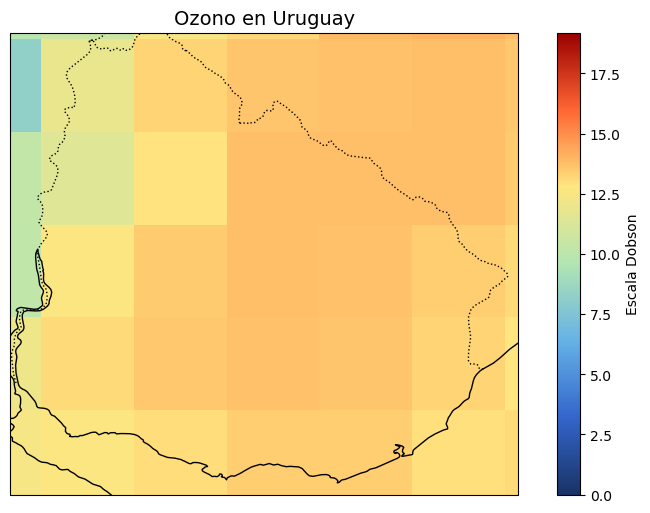

In [9]:
# Create latitude and longitude grids
lons = np.linspace(-180, 180, uv_data.shape[1])  # Longitudes
lats = np.linspace(-90, 90, uv_data.shape[0])    # Latitudes
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Create the map
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Ozono en Uruguay", fontsize=14)

# Add features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")

# Zoom into Uruguay
ax.set_extent([-58.5, -53.0, -35.1, -30.1], crs=ccrs.PlateCarree())

# Plot the ozone data
c = ax.pcolormesh(lon_grid, lat_grid, uv_data, shading="auto", cmap=custom_cmap, transform=ccrs.PlateCarree())

# Add a colorbar
cb = plt.colorbar(c, orientation="vertical", pad=0.05)
cb.set_label("Escala Dobson")  # Adjust based on actual units

"""
# Add ozono values as text labels
for i in range(ozone_data.shape[0]):
    for j in range(ozone_data.shape[1]):
        lon, lat = lon_grid[i, j], lat_grid[i, j]
        if -58.5 <= lon <= -53 and -35.1 <= lat <= -30.1:  # Only label inside Uruguay's zoomed-in area
            if not np.isnan(ozone_data[i, j]):  # Avoid NaN values
                ax.text(lon, lat, f"{ozone_data[i, j]:.2f}, {i}, {j}", fontsize=1,
                        ha="center", va="center", color="black",
                        transform=ccrs.PlateCarree())
"""
plt.show()

## Comparación con archivo extraido manualmente

Para esta versión tuve que agrandar el mapa un poco a -58.7 porque giovanni me estaba dando un resultado extra

In [31]:
# Cargamos la data y la ponemos en variables
with h5py.File(filename, "r") as file:
    uv_data = file[dataset_path_uv][:]
    
# Create latitude and longitude grids
lons = np.linspace(-180, 180, uv_data.shape[1]).round(3)  # Longitudes
lats = np.linspace(-90, 90, uv_data.shape[0]).round(3)    # Latitudes

lon_min, lon_max = -58.7, -53.0
lat_min, lat_max = -35.1, -30.1

lon_val = lons[(lons >= lon_min) & (lons <= lon_max)] 
lat_val = lats[(lats >= lat_min) & (lats <= lat_max)]

lon_idx = np.where((lons >= lon_min) & (lons <= lon_max))[0]
lat_idx = np.where((lats >= lat_min) & (lats <= lat_max))[0]

uv_subset = uv_data[np.min(lat_idx):np.max(lat_idx)+1, np.min(lon_idx):np.max(lon_idx)+1]

print(uv_subset)

[[12.398545  12.662691  13.030831  13.416982  13.36247   12.970672 ]
 [12.113648  13.070762  13.523326  13.706107  13.588763  13.221536 ]
 [10.177043  12.632793  13.472867  13.76054   13.69591   13.362533 ]
 [10.271991  11.44231   12.862645  13.764171  13.747885  13.7578335]
 [ 8.201251  11.917795  13.261714  13.62742   13.7231655 13.754501 ]]


In [32]:
from netCDF4 import Dataset

nc_data = Dataset('g4.timeAvgMap.OMUVBd_003_UVindex.20050101-20050101.58W_35S_53W_30S.nc', 'r')
uv_data_giovanni = nc_data.variables['OMUVBd_003_UVindex'][:, :]
print(uv_data_giovanni)

[[12.398545  12.662691  13.030831  13.416982  13.36247   12.970672 ]
 [12.113648  13.070762  13.523326  13.706107  13.588763  13.221536 ]
 [10.177043  12.632793  13.472867  13.76054   13.69591   13.362533 ]
 [10.271991  11.44231   12.862645  13.764171  13.747885  13.7578335]
 [ 8.201251  11.917795  13.261714  13.62742   13.7231655 13.754501 ]]


In [33]:
# Nice!
uv_data_giovanni - uv_subset

masked_array(
  data=[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [34]:
# Referencias obtenidas del archivo particular
print(nc_data.variables['lat'][:])
print(len(nc_data.variables['lat'][:]))
print(nc_data.variables['lon'][:])
print(len(nc_data.variables['lon'][:]))

[-34.5 -33.5 -32.5 -31.5 -30.5]
5
[-58.5 -57.5 -56.5 -55.5 -54.5 -53.5]
6


In [35]:
#Nuestras referencias
print('Lista completa de valores de latitud y longitud')
print(lat_val)
print(len(lat_val))
print(lon_val)
print(len(lon_val))

Lista completa de valores de latitud y longitud
[-34.693 -33.687 -32.682 -31.676 -30.67 ]
5
[-58.663 -57.66  -56.657 -55.655 -54.652 -53.649]
6


In [38]:
X = []

for l_lat in lat_idx:
    for l_lon in lon_idx:
        x = []
        x.append(lats[l_lat])
        x.append(lons[l_lon])
        x.append(uv_data[l_lat,l_lon])
        X.append(x)
        
X = np.asarray(X)

In [39]:
import pandas as pd

df = pd.DataFrame(X, columns = ['Latitud', 'Longitud', 'UV'])

df

,Latitud,Longitud,UV
0,-34.693,-58.663,12.398545
1,-34.693,-57.660,12.662691
2,-34.693,-56.657,13.030831
3,-34.693,-55.655,13.416982
4,-34.693,-54.652,13.362470
5,-34.693,-53.649,12.970672
6,-33.687,-58.663,12.113648
7,-33.687,-57.660,13.070762
8,-33.687,-56.657,13.523326
9,-33.687,-55.655,13.706107


In [40]:
filename.split('_')[2].replace('m','')

'20050101'

In [41]:
fecha = filename.split('_')[2].replace('m','')

df['Fecha'] = fecha

df

,Latitud,Longitud,UV,Fecha
0,-34.693,-58.663,12.398545,20050101
1,-34.693,-57.660,12.662691,20050101
2,-34.693,-56.657,13.030831,20050101
3,-34.693,-55.655,13.416982,20050101
4,-34.693,-54.652,13.362470,20050101
5,-34.693,-53.649,12.970672,20050101
6,-33.687,-58.663,12.113648,20050101
7,-33.687,-57.660,13.070762,20050101
8,-33.687,-56.657,13.523326,20050101
9,-33.687,-55.655,13.706107,20050101
